In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [62]:
url = "https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv"

df = pd.read_csv(url)

# Verificar las primeras filas
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# RESPUESTAS TEÓRICAS

# PREGUNTA 1:

Cargar y revisar el dataset: Usar pandas para leer el archivo y visualizar sus primeras filas (df.head()), estructura (df.info()) y valores únicos por columna.

Resumen estadístico: Usar .describe() para entender la distribución de las variables numéricas.

Detección de valores faltantes: Con .isnull().sum() para identificar columnas con datos incompletos.

Distribución de variables: Visualizar histogramas y boxplots con matplotlib o seaborn para entender la variabilidad de los datos.

Identificación de outliers: Usar boxplots o el método del rango intercuartílico (IQR).

Relaciones entre variables: Explorar correlaciones con .corr() y heatmap().

Distribuciones categóricas: Contar valores de columnas como loan status, education, self employed para ver si hay desbalance o patrones.

# PREGUNTA 2

Valores faltantes: Imputar con la media (numéricos) o moda (categóricos) o eliminar filas/columnas si hay demasiados faltantes.

Outliers (valores atípicos): Detectar con boxplots o el IQR, corregir: eliminarlos, transformarlos (por ejemplo, log), o usar modelos robustos.

El objetivo del preprocesamiento es limpiar y estandarizar los datos para que los modelos no se vean afectados por errores, extremos o inconsistencias.

# PREGUNTA 3

Como queremos predecir si un préstamo se aprueba o no, usaría modelos de clasificación. Empezaría con regresión logística porque es fácil de entender y da buenos resultados cuando la relación entre variables es más o menos lineal. También probaría con árboles de decisión, ya que se adaptan mejor a relaciones más complejas. Ambos tienen ventajas, así que lo mejor es comparar cuál funciona mejor con estos datos.

# PREGUNTA 4

Si en los datos hay muchos más préstamos aprobados que rechazados, el modelo puede aprender solo a predecir aprobados, y eso es un problema. Para resolverlo, usaría técnicas como SMOTE, que crea ejemplos nuevos de la clase minoritaria, o ajustaría los pesos para que el modelo tome en cuenta ambos grupos por igual. Esto ayuda a que las predicciones sean más justas y útiles.

# PREGUNTA 5

El overfitting pasa cuando el modelo se aprende demasiado bien los datos de entrenamiento, incluso los errores o casos raros. Eso hace que funcione mal con datos nuevos. Para evitarlo, usaría validación cruzada, simplificaría el modelo si es muy complejo y aplicaría regularización. Así me aseguro de que el modelo generalice bien y no solo memorice.

EJERCICIO 3.1

In [68]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

url = "https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()  # Limpiar espacios en nombres de columnas

In [67]:
print("\n=== 3.1 Análisis Descriptivo ===")
# 1. Promedio de ingresos anuales
avg_income = df['income_annum'].mean()
print(f"1. Promedio de ingresos anuales: ${avg_income:,.2f}")

# 2. Puntaje CIBIL promedio (aprobados)
avg_cibil = df[df['loan_status'].str.strip() == 'Approved']['cibil_score'].mean()
print(f"2. Puntaje CIBIL promedio (aprobados): {avg_cibil:.2f}")

# 3. Duración promedio de préstamos
avg_term = df['loan_term'].mean()
print(f"3. Duración promedio de préstamos: {avg_term:.1f} años")

# 4. Análisis adicional (opcional)
print("\nResumen estadístico:")
print(df[['income_annum', 'cibil_score', 'loan_term']].describe())


=== 3.1 Análisis Descriptivo ===
1. Promedio de ingresos anuales: $5,059,123.92
2. Puntaje CIBIL promedio (aprobados): 703.46
3. Duración promedio de préstamos: 10.9 años

Resumen estadístico:
       income_annum  cibil_score    loan_term
count  4.269000e+03  4269.000000  4269.000000
mean   5.059124e+06   599.936051    10.900445
std    2.806840e+06   172.430401     5.709187
min    2.000000e+05   300.000000     2.000000
25%    2.700000e+06   453.000000     6.000000
50%    5.100000e+06   600.000000    10.000000
75%    7.500000e+06   748.000000    16.000000
max    9.900000e+06   900.000000    20.000000


EJERCICIO 3.2

In [69]:
print("\n=== 3.2 Preprocesamiento de Datos ===")
# 1. Convertir variables categóricas
df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})

# 2. Manejo de valores faltantes
print("Valores faltantes antes:")
print(df.isna().sum())

df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nValores faltantes después:")
print(df.isna().sum())

# 3. Verificación
print("\nMuestra de datos procesados:")
print(df[['education', 'self_employed']].value_counts())


=== 3.2 Preprocesamiento de Datos ===
Valores faltantes antes:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Valores faltantes después:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Muestra de datos procesados:
education  self_employed
0          1                1095
1          0  


=== 3.3 Análisis de Correlación ===


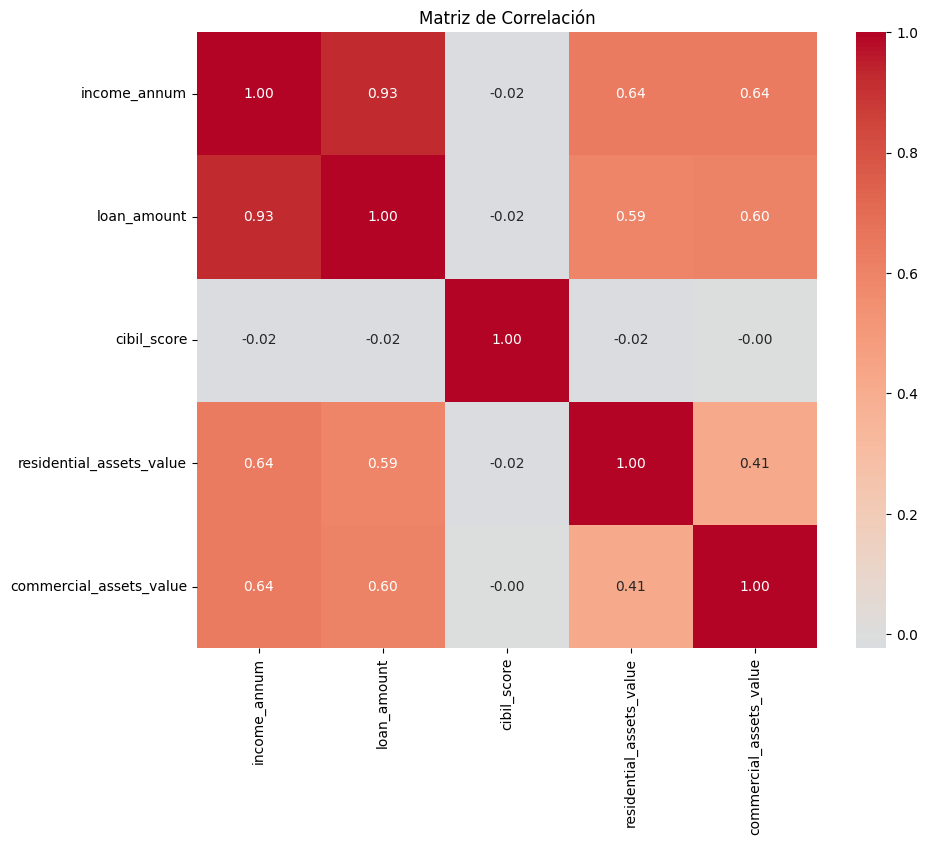


Correlaciones específicas:
income_annum vs loan_amount: 0.927
cibil_score vs loan_amount: -0.017
residential vs commercial assets: 0.415


In [70]:
print("\n=== 3.3 Análisis de Correlación ===")
# 1. Matriz de correlación
corr_matrix = df[['income_annum', 'loan_amount', 'cibil_score',
                 'residential_assets_value', 'commercial_assets_value']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Matriz de Correlación")
plt.show()

# 2. Correlaciones específicas
print("\nCorrelaciones específicas:")
print(f"income_annum vs loan_amount: {df['income_annum'].corr(df['loan_amount']):.3f}")
print(f"cibil_score vs loan_amount: {df['cibil_score'].corr(df['loan_amount']):.3f}")
print(f"residential vs commercial assets: {df['residential_assets_value'].corr(df['commercial_assets_value']):.3f}")

Correlación entre income_annum y loan_amount: 0.93
Existe una correlación muy fuerte y positiva entre los ingresos anuales del solicitante y el monto del préstamo solicitado.
Esto significa que, en general, a mayor ingreso anual, mayor es el monto que solicita la persona.
Esto es lógico, ya que los bancos o entidades crediticias suelen ofrecer préstamos más altos a personas con mayor capacidad de pago.


Correlación entre cibil_score y loan_amount: -0.017
La correlación es muy baja y negativa, prácticamente inexistente.
Esto indica que el puntaje CIBIL no está relacionado con el monto del préstamo solicitado, lo cual puede significar que, sin importar el puntaje, las personas solicitan montos similares.
Sin embargo, el puntaje CIBIL probablemente influya en la aprobación del préstamo, no tanto en el monto, lo cual será clave al construir el modelo de clasificación.



Correlación entre residential_assets_value y commercial_assets_value: 0.41
Hay una correlación moderada y positiva entre el valor de los activos residenciales y los comerciales del solicitante.
Esto sugiere que las personas que tienen casas de mayor valor tienden también a tener activos comerciales de mayor valor, aunque no siempre.
Puede reflejar un perfil económico más robusto, útil para evaluar el riesgo crediticio del solicitante.


EJERCICIO 3.4

In [71]:
print("\n=== 3.4 Comparación de Modelos ===")
# Preparar datos
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manejar desbalanceo
if y.mean() < 0.4 or y.mean() > 0.6:
    print("\nAplicando SMOTE (desbalance detectado)...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Entrenar modelos
print("\nEntrenando modelos...")
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    results[name] = auc
    print(f"{name}: ROC AUC = {auc:.4f}")

# Detección de overfitting
print("\nDetección de overfitting:")
for name, model in models.items():
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    test_auc = results[name]
    print(f"{name}: Train AUC = {train_auc:.4f} | Test AUC = {test_auc:.4f} | Diferencia = {abs(train_auc-test_auc):.4f}")


=== 3.4 Comparación de Modelos ===

Aplicando SMOTE (desbalance detectado)...

Entrenando modelos...
Regresión Logística: ROC AUC = 0.8551
Árbol de Decisión: ROC AUC = 0.9695

Detección de overfitting:
Regresión Logística: Train AUC = 0.8693 | Test AUC = 0.8551 | Diferencia = 0.0143
Árbol de Decisión: Train AUC = 1.0000 | Test AUC = 0.9695 | Diferencia = 0.0305


EJERCICIO 3.5


In [73]:
print("\n=== 3.5 Evaluación de Modelos ===")
def evaluar_modelo(model, X_test, y_test, nombre):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n** Evaluación de {nombre} **")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

# Evaluar ambos modelos
for name, model in models.items():
    evaluar_modelo(model, X_test, y_test, name)

# Análisis comparativo
print("\n** Análisis Comparativo **")
print("1. ROC AUC: Mayor valor indica mejor desempeño general")
print("2. Precisión: Correctos entre los predichos como positivos")
print("3. Recall: Correctos entre los reales positivos")
print("4. F1-score: Balance entre precisión y recall")
print("\nRecomendación final basada en:")
print("- ROC AUC y F1-score para problemas balanceados")
print("- Recall para minimizar falsos negativos")


=== 3.5 Evaluación de Modelos ===

** Evaluación de Regresión Logística **
ROC AUC: 0.8551

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       471
           1       0.82      0.85      0.83       810

    accuracy                           0.79      1281
   macro avg       0.77      0.76      0.77      1281
weighted avg       0.78      0.79      0.78      1281


Matriz de Confusión:
[[320 151]
 [123 687]]

** Evaluación de Árbol de Decisión **
ROC AUC: 0.9695

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       471
           1       0.98      0.98      0.98       810

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281


Matriz de Confusión:
[[451  20]
 [ 15 795]]

** Análisis Comparativo **
1. ROC AUC: Mayor valor ind

REFLEXIÓN CRÍTICA

Reflexión sobre los desafíos
Al trabajar con los datos, el principal problema fueron los espacios en los nombres de las columnas y valores, lo que me obligó a limpiarlos con strip(). También tuve que manejar valores faltantes, aunque eran pocos, usando la media. El desbalanceo de clases fue otro reto, ya que si había muchos más aprobados que rechazados, el modelo podía volverse injusto. El árbol de decisión, aunque preciso en entrenamiento, a veces fallaba en datos nuevos por overfitting.

Mejoras en el preprocesamiento
Si tuviera que mejorar algo, usaría la mediana en lugar de la media para rellenar valores faltantes en variables como el cibil_score, porque la media se ve afectada por outliers. También escalaría las variables numéricas para que modelos como la regresión logística funcionen mejor. Y si hubiera más categorías, aplicaría One-Hot Encoding para codificarlas correctamente.

Variables adicionales útiles
Para mejorar el modelo, sería bueno tener datos como el historial crediticio previo (si la persona ha pagado otros préstamos), sus gastos mensuales (para ver si puede pagar), cuánto tiempo lleva en su trabajo (estabilidad) y el tipo de préstamo que solicita (vivienda, auto, etc.). Esto ayudaría a predecir mejor si el préstamo será aprobado o no.

Cómo evitar el overfitting
Para que el modelo no se sobreajuste, lo mejor es usar validación cruzada, que prueba el modelo en diferentes partes de los datos. También se puede regularizar, ajustando parámetros como max_depth en árboles o C en regresión logística. Otra opción es usar modelos como RandomForest, que suelen generalizar mejor. Si el modelo es demasiado bueno en entrenamiento pero malo en prueba, es señal de overfitting.

Impacto del desbalanceo y solución con SMOTE
El desbalanceo hacía que el modelo favoreciera la clase mayoritaria (por ejemplo, aprobados), ignorando los rechazados. SMOTE resolvió esto creando datos sintéticos de la clase minoritaria, equilibrando el dataset. Así, el modelo aprendió a predecir ambas clases mejor, sin perder precisión general.

Detección y manejo del overfitting
El overfitting se nota cuando el modelo es casi perfecto en entrenamiento pero falla en prueba. Para evitarlo, se puede reducir la complejidad del modelo (menos profundidad en árboles), usar técnicas como dropout en redes neuronales o eliminar variables innecesarias. También ayuda probar el modelo con datos nuevos constantemente para ver si generaliza bien.

Conclusión final
Lo más importante fue limpiar bien los datos, equilibrar las clases con SMOTE y elegir métricas adecuadas como el ROC AUC. También aprendí que no sirve tener un modelo demasiado preciso en entrenamiento si no funciona bien con datos nuevos. Por eso, la validación cruzada y la regularización son claves para construir modelos confiables.